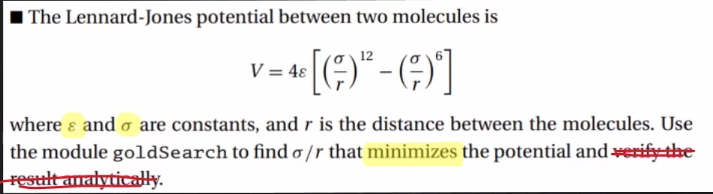

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [131]:
# epsilon default value = 0.997kJ/mol
# zigma apprximation value = 3.40 Angstroms
r = np.linspace(2.0, 6.0, 100)
f = lambda r : 4 * 0.997 * (((3.40 / r)**12 - (3.40 / r)**6))

In [135]:
# Newton function for finding peak
df = lambda f, x, h: (f(x+h)-f(x-h)) / (2*h) # First order differentiation
d2f = lambda f, x, h: (f(x+h)-2*f(x)+f(x-h)) / h**2 # Second order differentiation

def newton(f, x):
    counter = 0 # For iteration
    h = 1.0E-6
    while True:
        # Formula for finding peak with newton
        x = x - df(f, x, h)/d2f(f, x, h)
        
        # Each iteration increase counter
        counter += 1
        
        # If less than margin that we have set (close to 0)
        if np.abs(df(f, x, h)) < 1.0E-5: break
    return x, counter

In [136]:
# Golden Section Method for finding peak
def golden(f, xl, xr):
    counter = 0 # For iteration
    d = xr - xl # Difference between right point and left point
    r = (np.sqrt(5)-1.0)/2.0 # Golden ratio (constant)
    
    # Find point x1 and x2
    x1 = xl + r*d 
    x2 = xr - r*d
    
    while True:
        # Because the Lennard-Jones is a minimum peak (not maximum), flip the symbol
        # If x2 is larger than x1 
        if f(x1) < f(x2):
            # Replace xl (delete previous xl)
            xl = x2
            # Replace x2 with x1
            x2 = x1
            d = xr - xl
            x1 = xl + r*d
            
        # Else x1 larger than x2
        else:
            # Replace xr (delete previous xr)
            xr = x1
            # Replace x1 with x2
            x1 = x2
            d = xr - xl
            x2 = xr - r*d
            
        # Each iteration increase counter
        counter += 1
            
        # If less than margin that we have set (close to 0)
        if np.abs(d) < 1.0E-5: break
        xOpt = (x1 + x2) / 2
    return xOpt, counter

In [144]:
# Quadratic Interpolation for finding peak
def quadratic(f, x):
    counter = 0 # For iteration
    x3arr = np.array([]) # For storing x3 values
    h = 1.0E-6
    while True:
        # Numerator for function finding new x3
        n1 = f(x[0])*(x[1]**2 - x[2]**2)
        n2 = f(x[1])*(x[2]**2 - x[0]**2)
        n3 = f(x[2])*(x[0]**2 - x[1]**2)
        
        # Denominator for function finding new x3
        d1 = 2*f(x[0])*(x[1]-x[2])
        d2 = 2*f(x[1])*(x[2]-x[0])
        d3 = 2*f(x[2])*(x[0]-x[1])
        
        # Formula for finding new x3
        x3 = (n1+n2+n3)/(d1+d2+d3) 
        x3arr = np.append(x3arr, x3)
        
        # Each iteration increase counter
        counter += 1
      
        # If less than margin that we have set (close to 0)
        if np.abs(df(f, x3, h)) < 1.0E-5:
            xOpt = x3
            break
        
        # Substituting values to find new x3 in next iteration
        x[0] = x[1]
        x[1] = x[2]
        x[2] = x3
    return xOpt, counter, x3arr

Comparion of *r between methods
Using Newton method: 3.816370963854732
Using Golden Section method: 3.816373990742666
Using Quadratic Interpolation method: 3.816373990742666

Comparion of number of iterations between methods
Using Newton method for starting point 1.0: 23
Using Golden Section method for xl = 1.0 and xr = 6.0: 28
Using Quadratic Implementation method for x1 = 2.0, x2 = 3.0, x3 = 4.0: 7


(-2.0, 3.0)

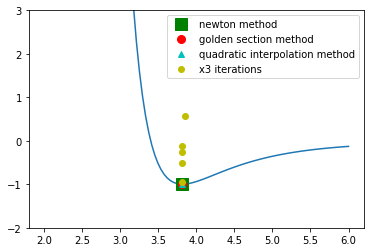

In [146]:
# Call the function
xPeakNewton, counterN = newton(f, 1.0)
xPeakGolden, counterG = golden(f, 1.0, 6.0)
xPeakQuadratic, counterQ, arr = quadratic(f, [2.0, 3.0, 4.0])
r2 = np.linspace(2.0, 6.0, arr.shape[0])

# Plotting graph
plt.plot(r, f(r))
plt.plot(xPeakNewton, f(xPeakNewton), 'sg', markersize = 12, label = "newton method")
plt.plot(xPeakGolden, f(xPeakGolden), 'or',  markersize = 8, label = "golden section method")
plt.plot(xPeakQuadratic, f(xPeakQuadratic), '^c', label = "quadratic interpolation method")
plt.plot(arr, f(r2), 'oy', label = "x3 iterations")


# Comparisons
print("Comparion of *r between methods")
print("Using Newton method:", xPeakNewton)
print("Using Golden Section method:", xPeakGolden)
print("Using Quadratic Interpolation method:", xPeakGolden)
print('')
print("Comparion of number of iterations between methods")
print("Using Newton method for starting point 1.0:", counterN)
print("Using Golden Section method for xl = 1.0 and xr = 6.0:", counterG)
print("Using Quadratic Implementation method for x1 = 2.0, x2 = 3.0, x3 = 4.0:", counterQ)

plt.legend()
plt.ylim(-2, 3)